## First Assignment

Lorenzo Domenichetti 2011653

due 18-04

In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



### Exercise 1 - Scotland lakes


Data load and selection through vectors;

In [2]:
original_table <- read.table("DATA/Scotland_Lochs.txt", header = TRUE, fill = TRUE, sep = "", dec = ".")

In [3]:
Loch <- original_table %>% select(1)
Vol  <- original_table %>% select(2)
Area <- original_table %>% select(3)
Length    <- original_table %>% select(4)
MaxDepth  <- original_table %>% select(5)
MeanDepth <- original_table %>% select(6)

df <- data.frame(Loch, Vol, Area, Length, MaxDepth, MeanDepth)
df

Loch,Volume,Area,Length,MaxDepth,MeanDepth
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Loch_Ness,7.45,56.0,39.0,230,132.0
Loch_Lomond,2.60,71.0,36.0,190,37.0
Loch_Morar,2.30,27.0,18.8,310,87.0
Loch_Tay,1.60,26.4,23.0,150,60.6
Loch_Awe,1.20,39.0,41.0,94,32.0
Loch_Maree,1.09,28.6,20.0,114,38.0
Loch_Ericht,1.08,18.6,23.0,156,57.6
Loch_Lochy,1.07,16.0,16.0,162,70.0
Loch_Rannoch,0.97,19.0,15.7,134,51.0


Evaluate the highest and lowest volume and area lake

In [4]:
message("Smallest volume loch: ", df[order(df$Volume, decreasing = FALSE),][1,]$Loch)
message("Largest volume loch: ", df[order(df$Volume, decreasing = TRUE),][1,]$Loch)

Smallest volume loch: Loch_Shin

Largest volume loch: Loch_Ness



In [5]:
message("Smallest area loch: ", df[order(df$Area, decreasing = FALSE),][1,]$Loch)
message("Largest area loch: ", df[order(df$Area, decreasing = TRUE),][1,]$Loch)

Smallest area loch: Loch_Katrine

Largest area loch: Loch_Lomond



Order the frame with respect to the area and determine the two largest area lakes

In [6]:
top2Areas <- head(df[order(-df$Area),],2)
top2Areas

,Loch,Volume,Area,Length,MaxDepth,MeanDepth
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,Loch_Lomond,2.60,71,36,190,37
1,Loch_Ness,7.45,56,39,230,132


Ordering the frame with respect to the area and determine the two largest area lakes

By summing up the areas occpupied by the lakes, determine the area of Scotland covered by water

In [7]:
message("Area of Scotland covered by water: ", sum(df$Area), " km^2")

Area of Scotland covered by water: 372 km^2



### Exercise 2 - Crude Oil Production

Write R code that is able to read the file and import it in a data frame structure. (Hint: before
loading the file, open it with a text editor and check its structure).


In [8]:
oil_df <- read.table("DATA/crude-oil-prices.csv", sep = ",", header = T)
head(oil_df, 10)

,Entity,Code,Year,OilPrice
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59
6,World,OWID_WRL,1866,3.74
7,World,OWID_WRL,1867,2.41
8,World,OWID_WRL,1868,3.63
9,World,OWID_WRL,1869,3.64


Produce a plot with the Oil price as a function of the year

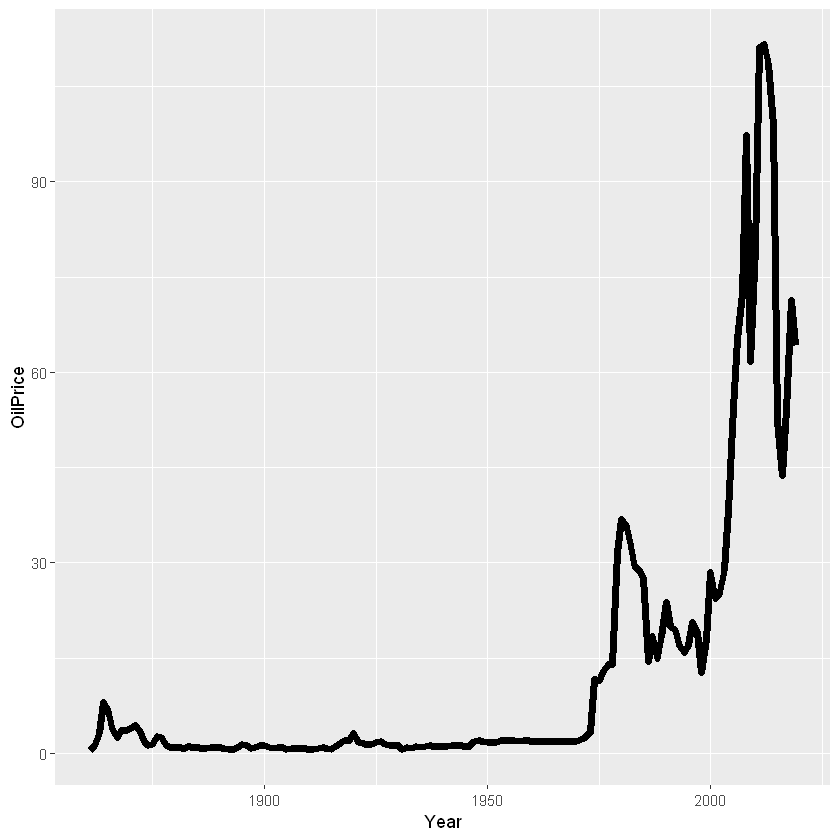

In [9]:
ggplot(oil_df) + aes(x = Year, y = OilPrice, group = Entity) + geom_line(size = 2, color = 'black')

Which is the highest price in history ? When did it occur?

In [10]:
max_OP <- oil_df[oil_df$OilPrice == max(oil_df$OilPrice),]
message("The highest price in history was " , max_OP$OilPrice, " and it occurred during ", max_OP$Year)
max_OP

The highest price in history was 111.669702380952 and it occurred during 2012



,Entity,Code,Year,OilPrice
,<chr>,<chr>,<int>,<dbl>
152,World,OWID_WRL,2012,111.6697


Plot the derivative of the curve, simply evaluated with the finite difference formula;

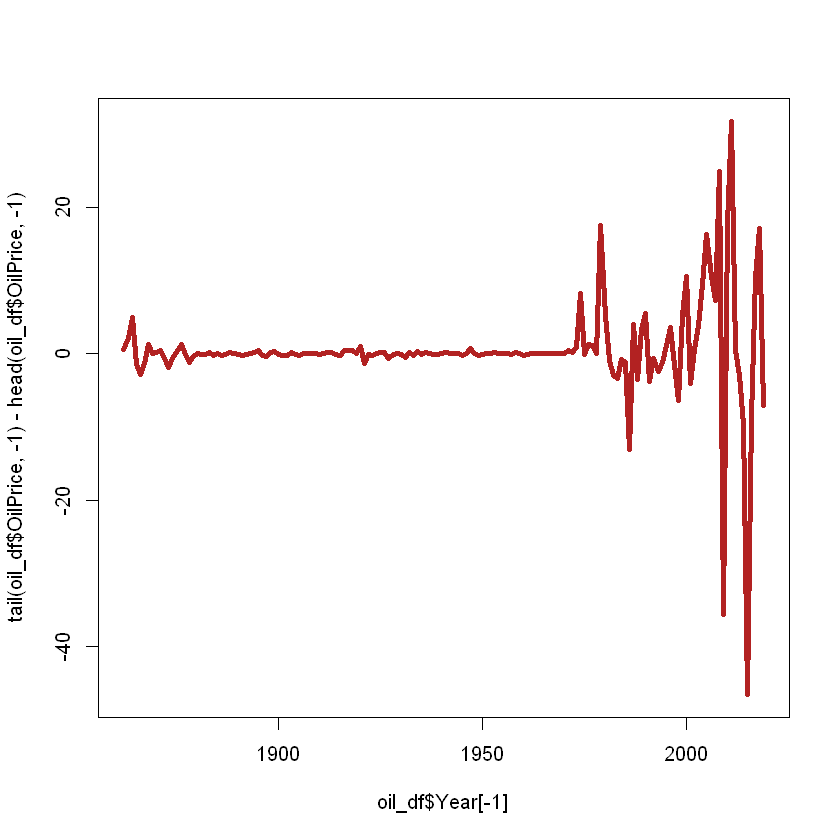

In [11]:
plot(oil_df$Year[-1], tail(oil_df$OilPrice, -1) - head(oil_df$OilPrice, -1), t= 'l', col = 'firebrick', lwd = 4)

### Exercise 3 -  World Coal Production

Write R code that is able to read the file and import it in a tibble structure

In [12]:
coal_df <- tibble(read.csv2("DATA/coal-production-by-country.csv", sep = ",", header = T, ))

Count the number of countries available in the file and produce a barplot with the number of entries
for each country

In [13]:
coal_count = subset(coal_df, !(Entity %in% c("Europe", "North America","EU-28", "CIS", "Eurasia", "Europe (other)", 'Asia Pacific','Asia and Oceania', 'Central and South America', 'OECD','OPEC','Other Africa','Other Asia & Pacific', 'Other CIS','Other S. & Cent. America', 'USSR', "World")))
message("The total unique Entities in the original data are ", length(unique(coal_df$Entity)), " but actually there are ", length(unique(coal_count$Entity)), " Countries")

The total unique Entities in the original data are 200 but actually the Countries are 183



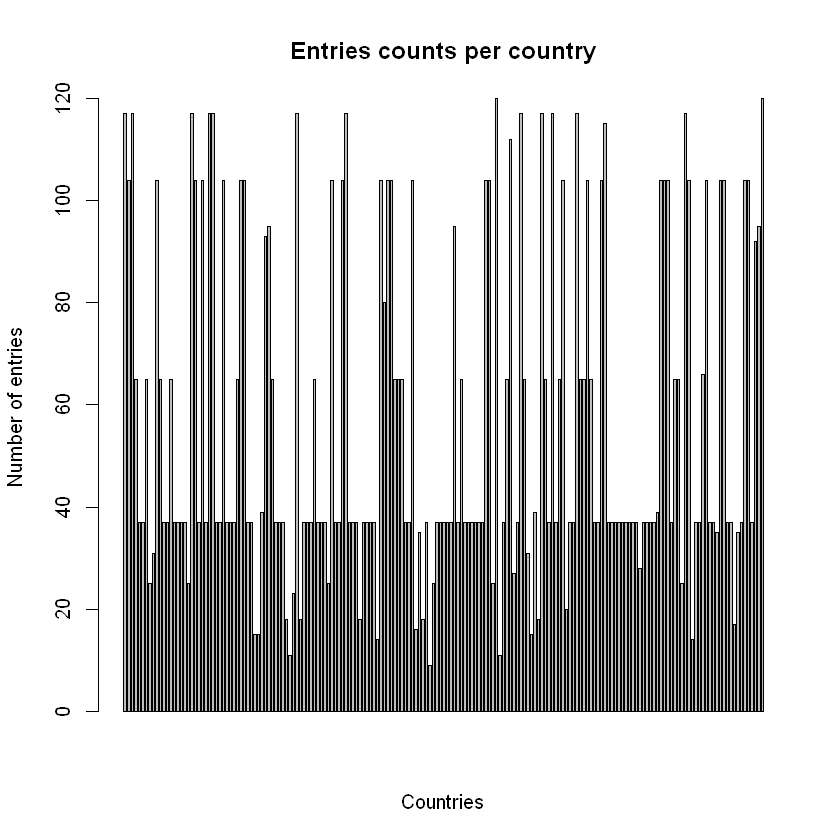

In [14]:
Ent_Frequency <- coal_count %>% group_by(Entity) %>% count()
# head(Ent_Frequency,10)
barplot(Ent_Frequency$n, xlab = "Countries", ylab = "Number of entries", main  = "Entries counts per country")

For the following items select only the years ≥ 1970:

In [15]:
coal_df_gt1970 <- coal_df[coal_df$Year > 1970,]

Selecting only the year after 1970, determine the total integrated production for each country and
print the top 5 Countries with highest coal productions

In [16]:
coal_df_gt1970 <- transform(coal_df_gt1970, CoalProduction_TWh = as.numeric(CoalProduction_TWh))
coal_df_gt1970_countries <- coal_df_gt1970


coal_df_gt1970_countries = subset(coal_df_gt1970, !(Entity %in% c("North America", "Europe","EU-28", "CIS", "Eurasia", "Europe (other)", 'Asia Pacific','Asia and Oceania', 'Central and South America', 'OECD','OPEC','Other Africa','Other Asia & Pacific', 'Other CIS','Other S. & Cent. America', 'USSR', "World")))


prod_sum <- aggregate(coal_df_gt1970_countries$CoalProduction_TWh, by=list(Category=coal_df_gt1970_countries$Entity), FUN=sum)
top5Countries <- head(prod_sum[order(-prod_sum$x),], 5)
top5Countries

,Category,x
,<chr>,<dbl>
29,China,459564.65
151,United States,226068.84
120,Russia,98251.65
8,Australia,83077.07
69,India,77043.45


For the 5 top Countries, create a plot of production as a function of time

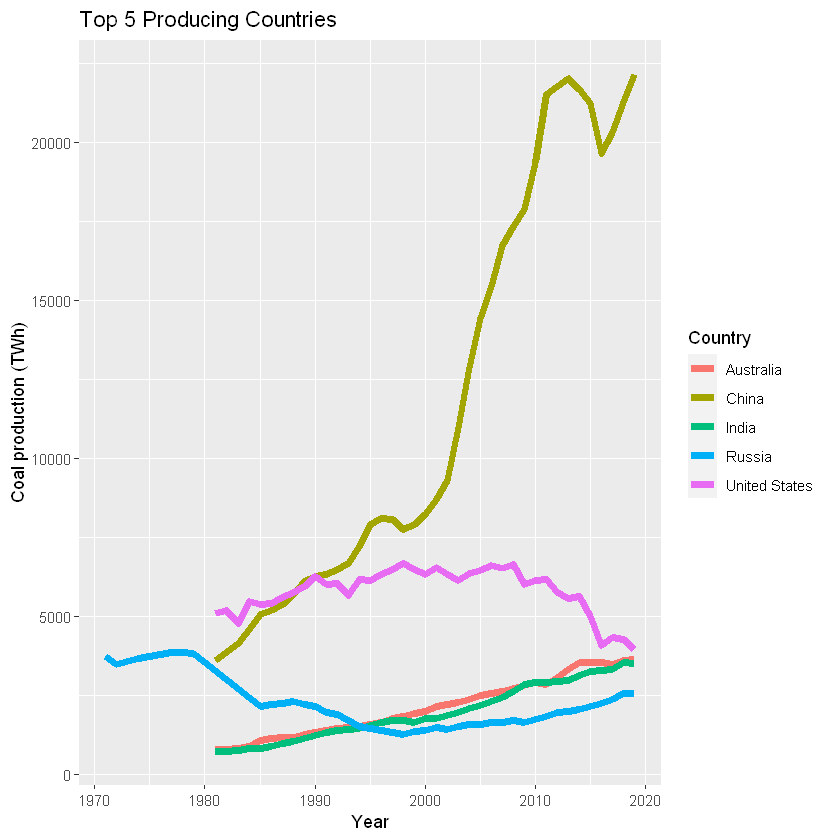

In [17]:
ggplot(subset(coal_df_gt1970_countries,Entity %in% top5Countries$Category)) + aes (x = Year, y = CoalProduction_TWh, group = Entity, colour = Entity) + 
    geom_line(size=2) + labs(title = "Top 5 Producing Countries",x = "Year", y = "Coal production (TWh)", colour = "Country")

Generate a plot with the cumulative sum of the World’s coal production over the years

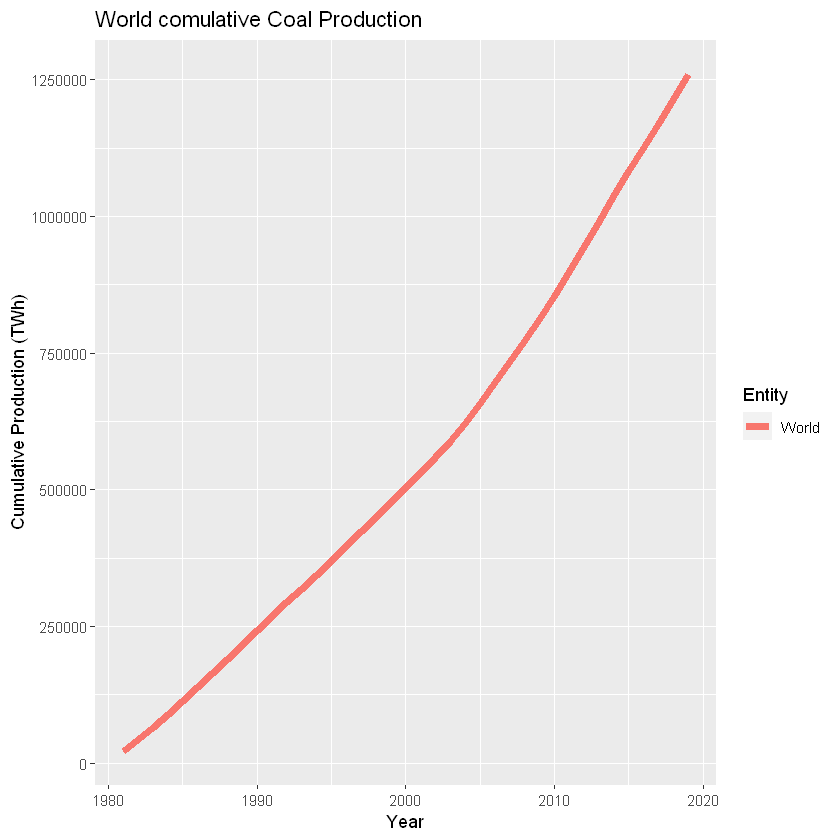

In [18]:
ggplot(coal_df_gt1970 %>% subset(Entity == "World") %>% mutate(CumSum = cumsum(CoalProduction_TWh))) + aes ( x = Year, y = CumSum, colour = Entity) +geom_line(size =2) + 
labs(title = "World comulative Coal Production", y = "Cumulative Production (TWh)", color = "Entity")

### Exercise 4 -  Covid19 Vaccine

The file vaccinationsby-manufacturer.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv) contains a summary
on the vaccination data grouped by Vaccine type and Country.

In [19]:
vacc_man <- read.csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv")
#as.Date(vacc_man$date, format =  "YYYY-MM-DD")
library(lubridate)
vacc_man$date <- ymd(vacc_man$date)
vacc_man %>% head(10)



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




,location,date,vaccine,total_vaccinations
,<chr>,<date>,<chr>,<int>
1,Chile,2020-12-24,Pfizer/BioNTech,420
2,Chile,2020-12-25,Pfizer/BioNTech,5198
3,Chile,2020-12-26,Pfizer/BioNTech,8338
4,Chile,2020-12-27,Pfizer/BioNTech,8649
5,Chile,2020-12-28,Pfizer/BioNTech,8649
6,Chile,2020-12-29,Pfizer/BioNTech,8649
7,Chile,2020-12-30,Pfizer/BioNTech,8649
8,Chile,2020-12-31,Pfizer/BioNTech,8649
9,Chile,2021-01-01,Pfizer/BioNTech,8649


Filter the original tibble by selecting the following countries: Italy

In [20]:
it_c19 <- filter(vacc_man, location == 'Italy')
tmp <- aggregate(it_c19$total_vaccinations, by=list(Category=it_c19$date), FUN=sum)

Plot the number of vaccines given as a function of time for the different vaccine manufacturer

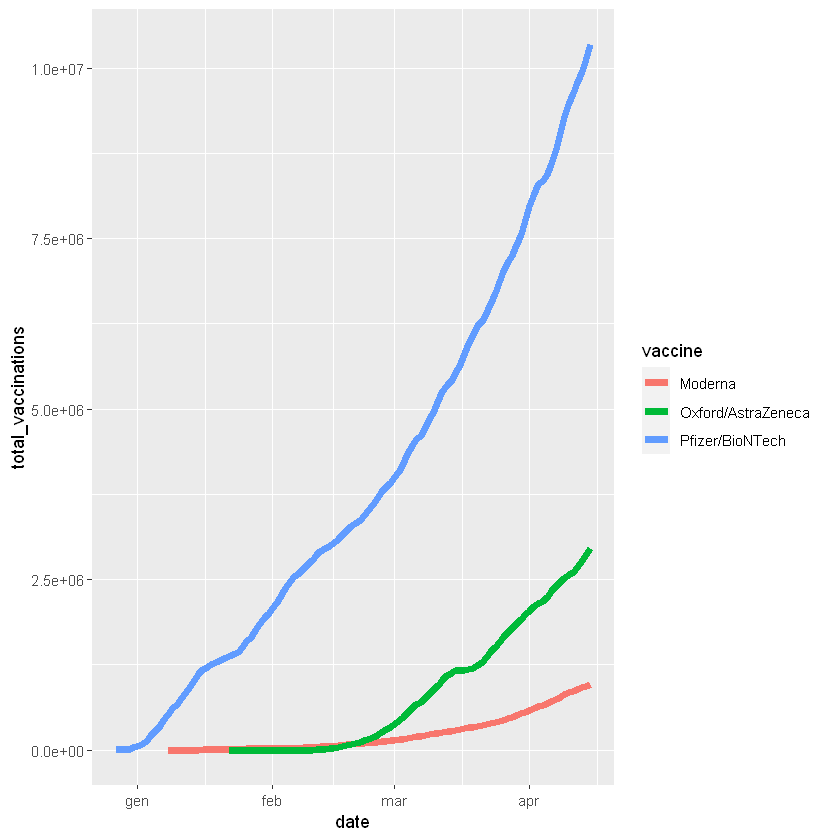

In [21]:
#plotting only the three different vaccines
ggplot(subset(vacc_man, location %in% "Italy")) + aes (x = date, y = total_vaccinations, group = vaccine, colour = vaccine) + 
    geom_line(size = 2)

From the same tibble plot the total number of vaccines shot per day in Italy

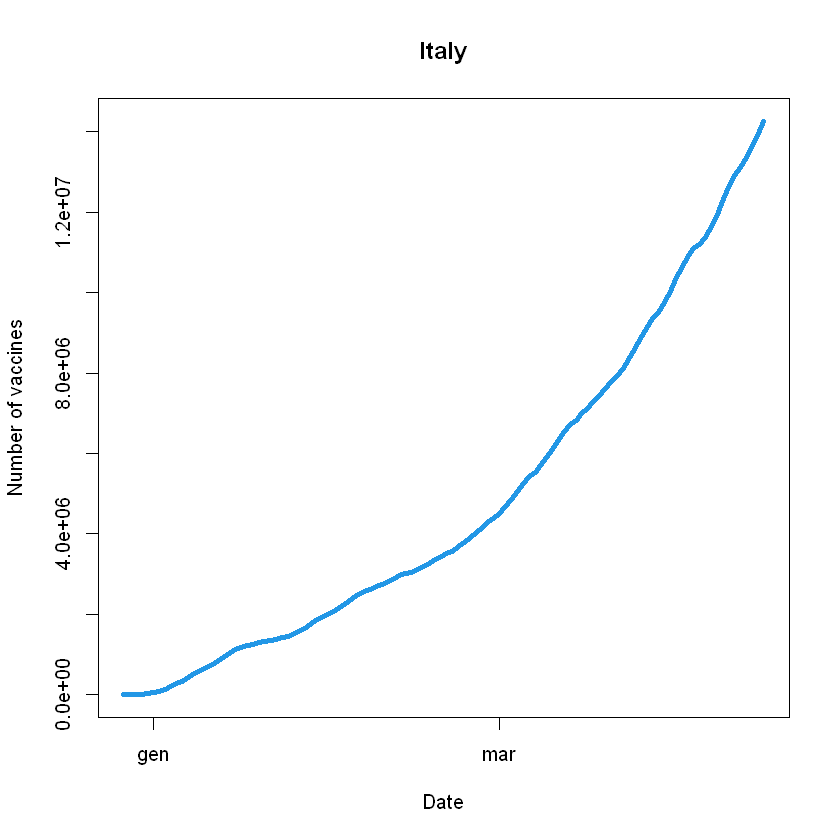

In [22]:
plot(tmp$Category, tmp$x, type="l",col = 4,lwd = 4, ylim = c(0, max(tmp$x)),
     xlab = "Date", ylab = "Number of vaccines", main= "Italy")

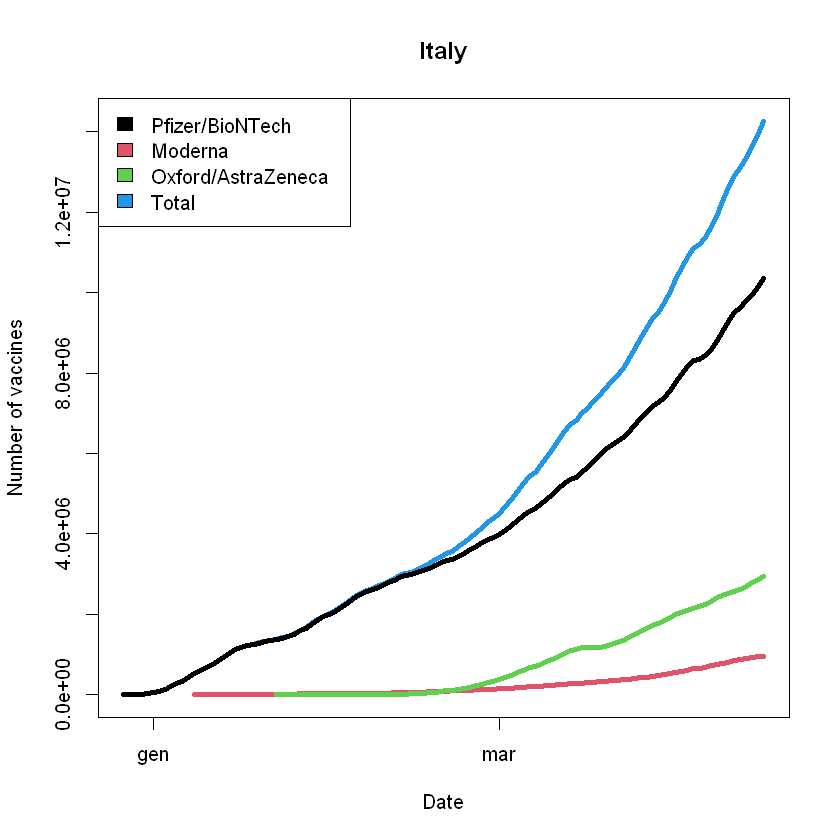

In [23]:
#plotting the cumulative sum and the three differnt vaccine options
plot(tmp$Category, tmp$x, type="l",col = 4,lwd = 4, ylim = c(0, max(tmp$x)),
     xlab = "Date", ylab = "Number of vaccines", main= "Italy")
lines(it_c19$date[it_c19$vaccine=="Moderna"], it_c19$total_vaccinations[it_c19$vaccine=="Moderna"], col=2, type="l",lwd = 4)
lines(it_c19$date[it_c19$vaccine=="Oxford/AstraZeneca"], it_c19$total_vaccinations[it_c19$vaccine=="Oxford/AstraZeneca"], col=3, type="l",lwd = 4)
lines(it_c19$date[it_c19$vaccine=="Pfizer/BioNTech"], it_c19$total_vaccinations[it_c19$vaccine=="Pfizer/BioNTech"], type="l",col = 1,lwd = 4,)
legend("topleft",
c("Pfizer/BioNTech","Moderna", "Oxford/AstraZeneca", "Total"),
fill=c(1,2,3,4)
)

Do the same exercise for the following countries: Germany and United States of America

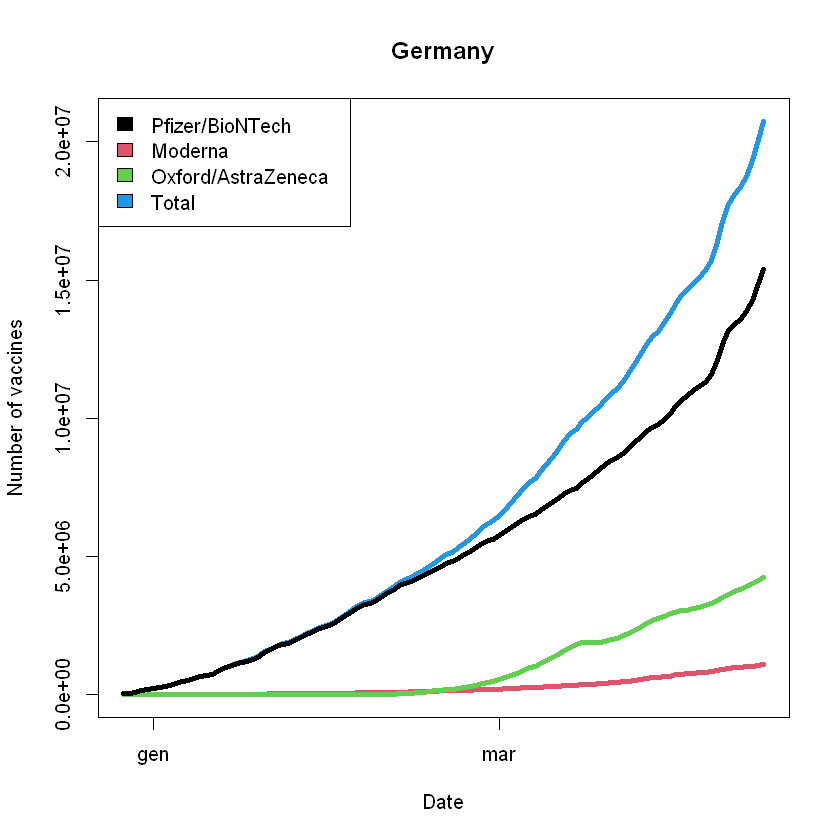

In [24]:
Ge_c19 <- filter(vacc_man, location == 'Germany')
tmp <- aggregate(Ge_c19$total_vaccinations, by=list(Category=Ge_c19$date), FUN=sum)


plot(tmp$Category, tmp$x, type="l",col = 4,lwd = 4, ylim = c(0, max(tmp$x)),
     xlab = "Date", ylab = "Number of vaccines", main= "Germany")
lines(Ge_c19$date[Ge_c19$vaccine=="Moderna"], Ge_c19$total_vaccinations[Ge_c19$vaccine=="Moderna"], col=2, type="l",lwd = 4)
lines(Ge_c19$date[Ge_c19$vaccine=="Oxford/AstraZeneca"], Ge_c19$total_vaccinations[Ge_c19$vaccine=="Oxford/AstraZeneca"], col=3, type="l",lwd = 4)
lines(Ge_c19$date[Ge_c19$vaccine=="Pfizer/BioNTech"], Ge_c19$total_vaccinations[Ge_c19$vaccine=="Pfizer/BioNTech"], type="l",col = 1,lwd = 4,)
legend("topleft",
c("Pfizer/BioNTech","Moderna", "Oxford/AstraZeneca", "Total"),
fill=c(1,2,3,4)
)

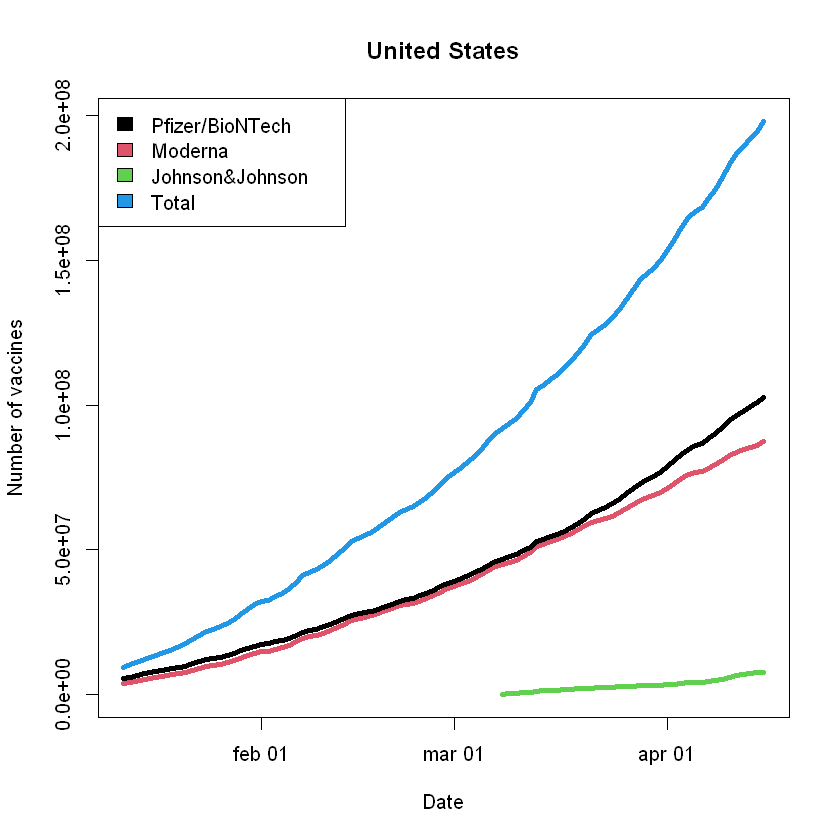

In [25]:
US_c19 <- filter(vacc_man, location == 'United States')
tmp <- aggregate(US_c19$total_vaccinations, by=list(Category=US_c19$date), FUN=sum)


plot(tmp$Category, tmp$x, type="l",col = 4,lwd = 4, ylim = c(0, max(tmp$x)),
     xlab = "Date", ylab = "Number of vaccines", main= "United States")
lines(US_c19$date[US_c19$vaccine=="Moderna"], US_c19$total_vaccinations[US_c19$vaccine=="Moderna"], col=2, type="l",lwd = 4)
lines(US_c19$date[US_c19$vaccine=="Johnson&Johnson"], US_c19$total_vaccinations[US_c19$vaccine=="Johnson&Johnson"], col=3, type="l",lwd = 4)
lines(US_c19$date[US_c19$vaccine=="Pfizer/BioNTech"], US_c19$total_vaccinations[US_c19$vaccine=="Pfizer/BioNTech"], type="l",col = 1,lwd = 4,)
legend("topleft",
c("Pfizer/BioNTech","Moderna", "Johnson&Johnson", "Total"),
fill=c(1,2,3,4)
)

 The file vaccinations.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv) contains country-by-country data on global COVID-19
vaccinations. The dataset includes some subnational locations (England, Northern Ireland, Scotland, Wales, . . .) and international aggregates (World, continents, European Union ldots). They
can be identified by their iso code that starts with OWID


Selecting all the European countries in the tibble, plot the number of daily vaccinations per million
as a function of date

In [26]:
vacc_data<-tibble(read.csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'))

Warning message:
"Removed 16 row(s) containing missing values (geom_path)."


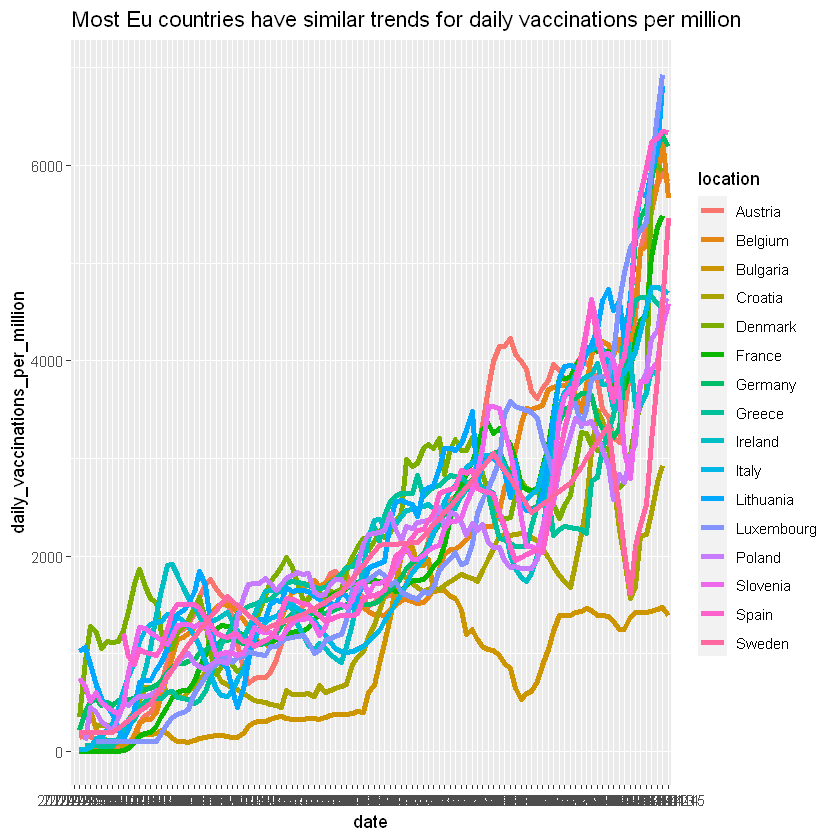

In [27]:
EU_countries <- c("Austria","Italy","Belgium","Bulgaria","Lithuania","Croatia","Luxembourg","Denmark","Poland","France","Germany","Slovenia","Greece","Spain","Sweden","Ireland")
# EU_data <- subset (vacc_data, location %in% EU_countries)
ggplot(subset (vacc_data, location %in% EU_countries, rm.na = TRUE)) + aes(x = date, y = daily_vaccinations_per_million , group = location, colour = location) +
geom_line(size = 1.5) + ggtitle("Most Eu countries have similar trends for daily vaccinations per million")

Study the data structure and produce few relevant plots of your taste

In [28]:
it_vacc_data <- filter(vacc_data, location == 'Italy')
it_vacc_data %>% head(10)
it_vacc_data$date <- ymd(it_vacc_data$date)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
Italy,ITA,2020-12-27,7169,7169,NA,NA,NA,0.01,0.01,NA,NA
Italy,ITA,2020-12-28,8590,8590,NA,1421,1421,0.01,0.01,NA,24
Italy,ITA,2020-12-29,9595,9595,NA,1005,1213,0.02,0.02,NA,20
Italy,ITA,2020-12-30,14322,14322,NA,4727,2384,0.02,0.02,NA,39
Italy,ITA,2020-12-31,39798,39798,NA,25476,8157,0.07,0.07,NA,135
Italy,ITA,2021-01-01,50852,50852,NA,11054,8737,0.08,0.08,NA,145
Italy,ITA,2021-01-02,89362,89362,NA,38510,13699,0.15,0.15,NA,227
Italy,ITA,2021-01-03,124520,124520,NA,35158,16764,0.21,0.21,NA,277
Italy,ITA,2021-01-04,193251,193251,NA,68731,26380,0.32,0.32,NA,436


Warning message:
"Removed 21 row(s) containing missing values (geom_path)."


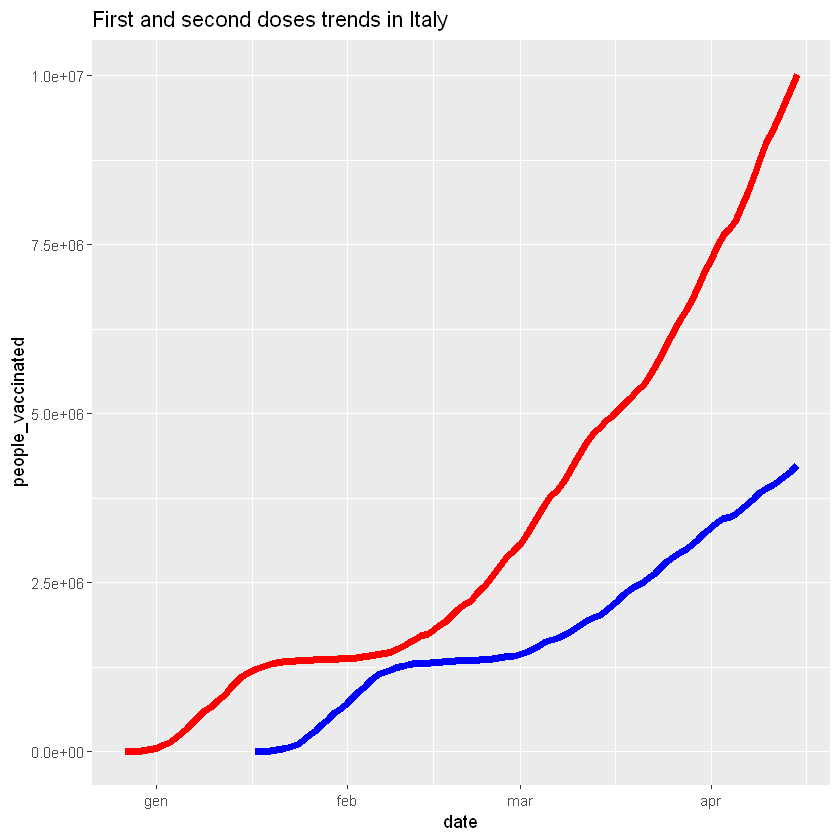

In [29]:
ggplot() + 
geom_line(data = it_vacc_data, aes(x = date, y = people_vaccinated), color = "red", size = 2, ) + 
geom_line(data = it_vacc_data, aes(x = date, y = people_fully_vaccinated), color = "blue", size = 2) +
ggtitle("First and second doses trends in Italy") 

Warning message:
"Removed 3 row(s) containing missing values (geom_path)."


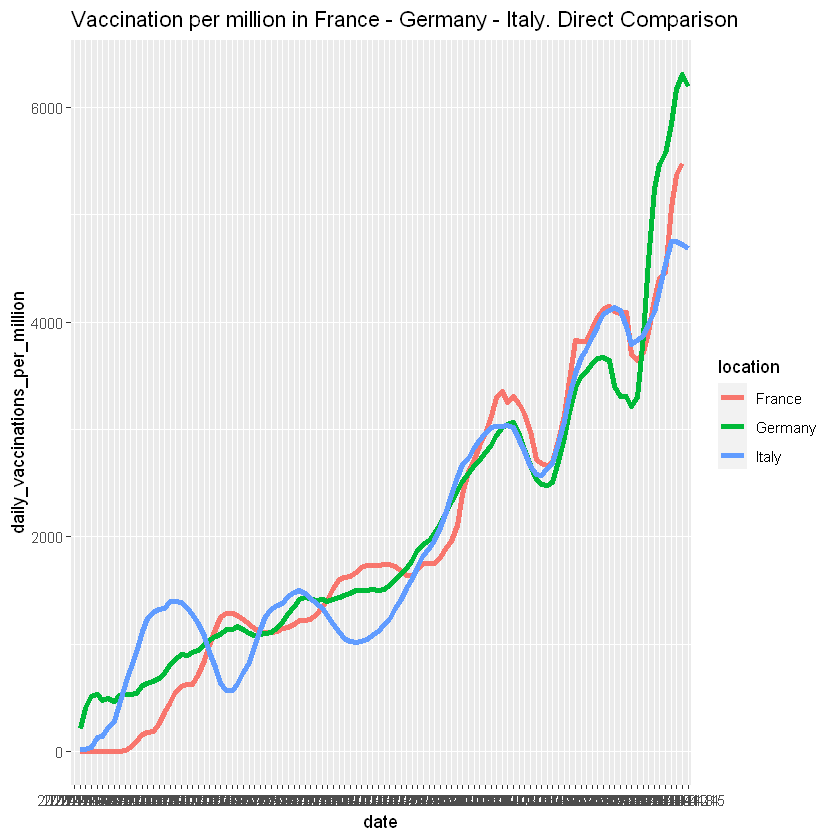

In [30]:
it_Ge_fr  <- filter(vacc_data, location %in% c('Italy', 'Germany', 'France'))

ggplot(subset (it_Ge_fr, rm.na = TRUE)) + aes(x = date, y = daily_vaccinations_per_million , group = location, colour = location) + 
geom_line(size = 1.5) + 
ggtitle("Vaccination per million in France - Germany - Italy. Direct Comparison") 